## Construction du modèle de la classification des films

In [1]:
%store -r X_principalDf
%store -r Y
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X = X_principalDf
# Diviser la dataset en train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape

Using TensorFlow backend.


(3839, 10)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.activations import relu, sigmoid
from keras.optimizers import Adam

# Construire le modèle
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(lr=0.001, decay = 0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Entrainer le modèle
history = model.fit(X_train, y_train, validation_split=0.30, batch_size=100, epochs=100)

Train on 2687 samples, validate on 1152 samples
Epoch 1/100
2687/2687 [==============================] - 0s 156us/step - loss: 0.6851 - acc: 0.5698 - val_loss: 0.6721 - val_acc: 0.5755
Epoch 2/100
2687/2687 [==============================] - 0s 25us/step - loss: 0.6688 - acc: 0.5709 - val_loss: 0.6574 - val_acc: 0.5833
Epoch 3/100
2687/2687 [==============================] - 0s 27us/step - loss: 0.6576 - acc: 0.5836 - val_loss: 0.6461 - val_acc: 0.6267
Epoch 4/100
2687/2687 [==============================] - 0s 25us/step - loss: 0.6526 - acc: 0.6022 - val_loss: 0.6397 - val_acc: 0.6563
Epoch 5/100
2687/2687 [==============================] - 0s 25us/step - loss: 0.6452 - acc: 0.6256 - val_loss: 0.6356 - val_acc: 0.6502
Epoch 6/100
2687/2687 [==============================] - 0s 25us/step - loss: 0.6429 - acc: 0.6375 - val_loss: 0.6335 - val_acc: 0.6510
Epoch 7/100
2687/2687 [==============================] - 0s 26us/step - loss: 0.6429 - acc: 0.6349 - val_loss: 0.6318 - val_acc: 0.6519

2687/2687 [==============================] - 0s 24us/step - loss: 0.6330 - acc: 0.6502 - val_loss: 0.6256 - val_acc: 0.6615
Epoch 61/100
2687/2687 [==============================] - 0s 21us/step - loss: 0.6322 - acc: 0.6513 - val_loss: 0.6255 - val_acc: 0.6641
Epoch 62/100
2687/2687 [==============================] - 0s 18us/step - loss: 0.6268 - acc: 0.6491 - val_loss: 0.6251 - val_acc: 0.6641
Epoch 63/100
2687/2687 [==============================] - 0s 18us/step - loss: 0.6285 - acc: 0.6576 - val_loss: 0.6253 - val_acc: 0.6641
Epoch 64/100
2687/2687 [==============================] - 0s 20us/step - loss: 0.6317 - acc: 0.6517 - val_loss: 0.6254 - val_acc: 0.6632
Epoch 65/100
2687/2687 [==============================] - 0s 20us/step - loss: 0.6292 - acc: 0.6505 - val_loss: 0.6255 - val_acc: 0.6632
Epoch 66/100
2687/2687 [==============================] - 0s 20us/step - loss: 0.6258 - acc: 0.6587 - val_loss: 0.6252 - val_acc: 0.6623
Epoch 67/100
2687/2687 [==============================

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                352       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                660       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,365
Trainable params: 1,365
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.evaluate(X_test, y_test) # fonction d'erreur (binary cross entropy) + Accuracy

960/960 [==============================] - 0s 46us/step


[0.6254732489585877, 0.6708333333333333]

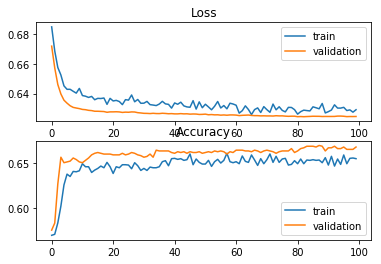

In [8]:
from matplotlib import pyplot

# Tracer la courbe d'erreur pendant l'apprentissage
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
# Tracer la courbe de la précision pendant l'apprentissage
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='validation')
pyplot.legend()
pyplot.show()

In [6]:
from sklearn.metrics import confusion_matrix

# La matrice de confusion
print("La matrice de confusion:\n {}".format(confusion_matrix(y_test, model.predict_classes(X_test))))

La matrice de confusion:
 [[230 167]
 [149 414]]


In [7]:
#pickle pour enregistrer le modèle
# enregistrer le modèle en format JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# enregistrer les poids en format HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
